In [1]:
import os, sys
sys.path.append( os.path.join('..', '..'))

import numpy as np
from scipy.constants import e, k, epsilon_0

# my own modules
from src.solver import Poisson_solver1D as solver1D
from src.solver import updater
from src.model.carrier_density import *

# Si N + BC? 

In [2]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(0, 1e-4, 1000) # cm
Na = np.zeros_like(x)
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [3]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  


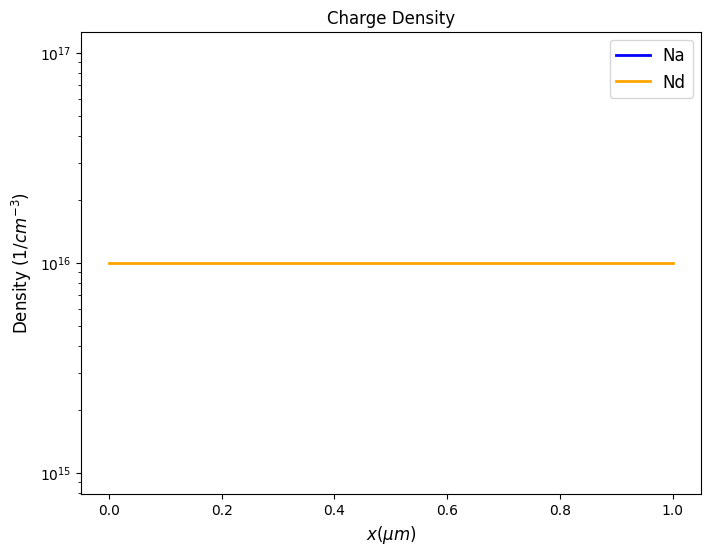

In [4]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [5]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, v0= 0, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000)

  0%|          | 0/2000 [00:00<?, ?it/s]

 19%|█▉        | 383/2000 [00:00<00:03, 451.21it/s]


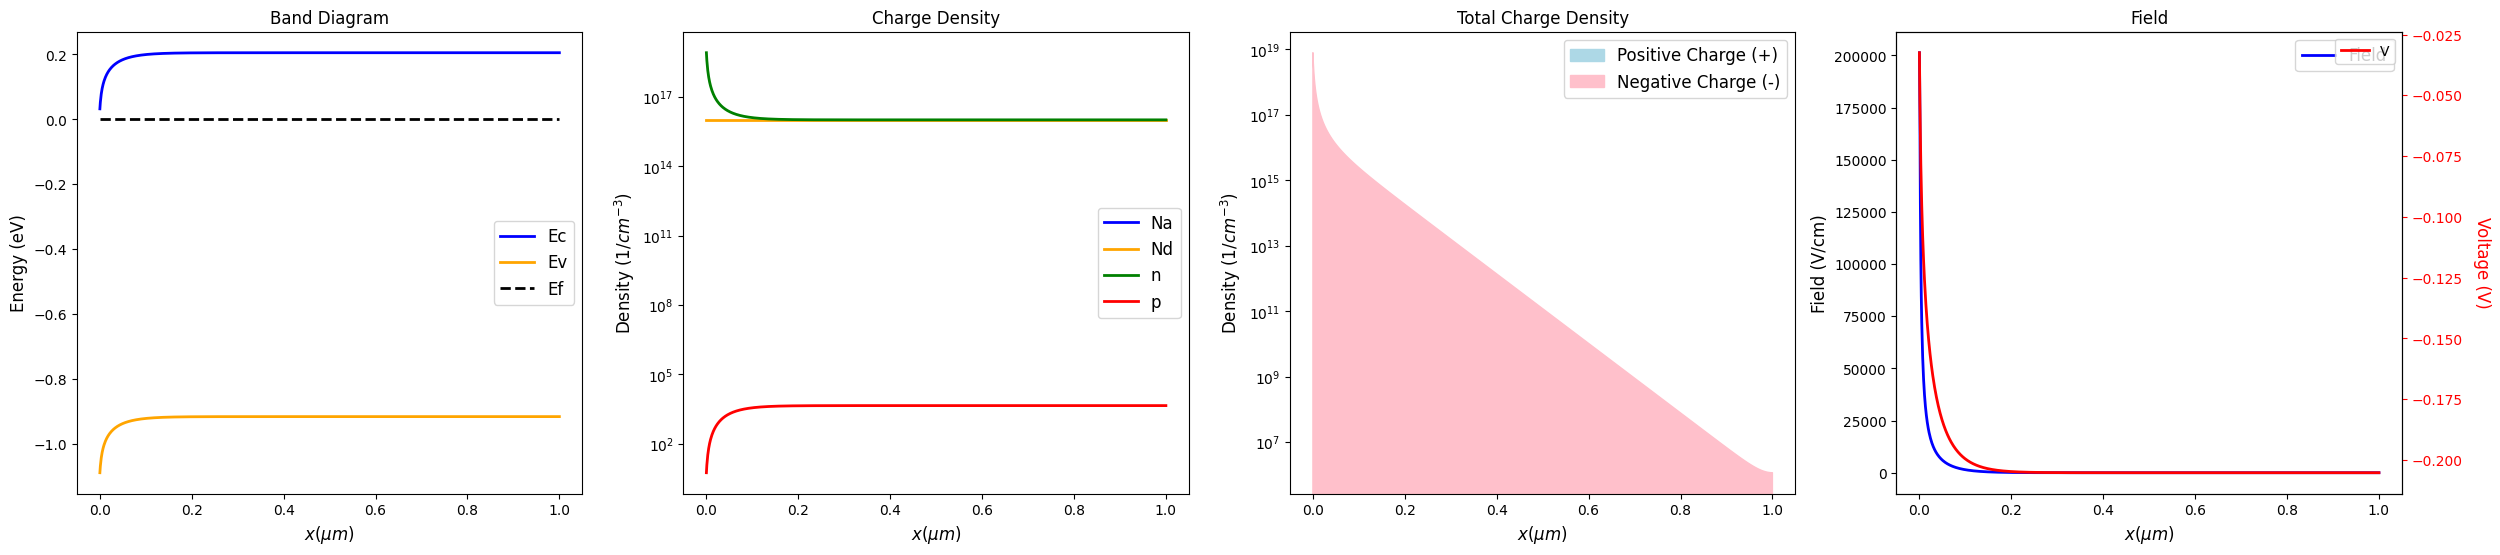

In [6]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N + BC? -> Metal - Semi junction

In [7]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(0, 1e-4, 1000) # cm
Na = np.zeros_like(x)
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [8]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  


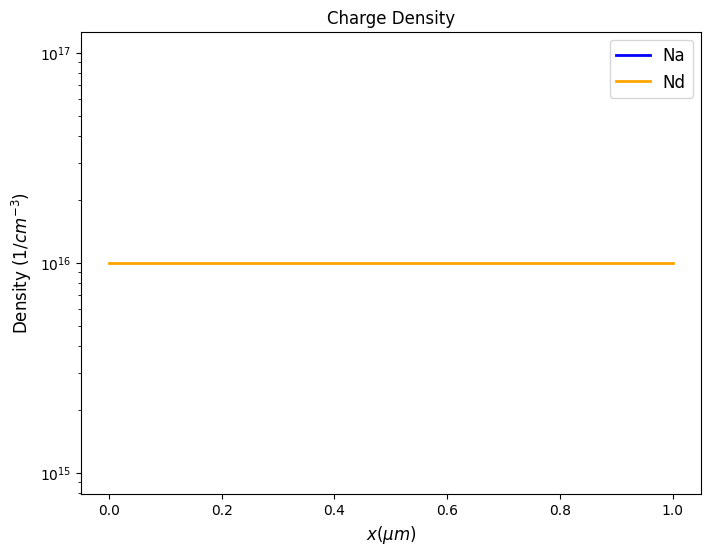

In [9]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [10]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=1000, tol=1e-10)

 21%|██        | 208/1000 [00:00<00:02, 388.15it/s]


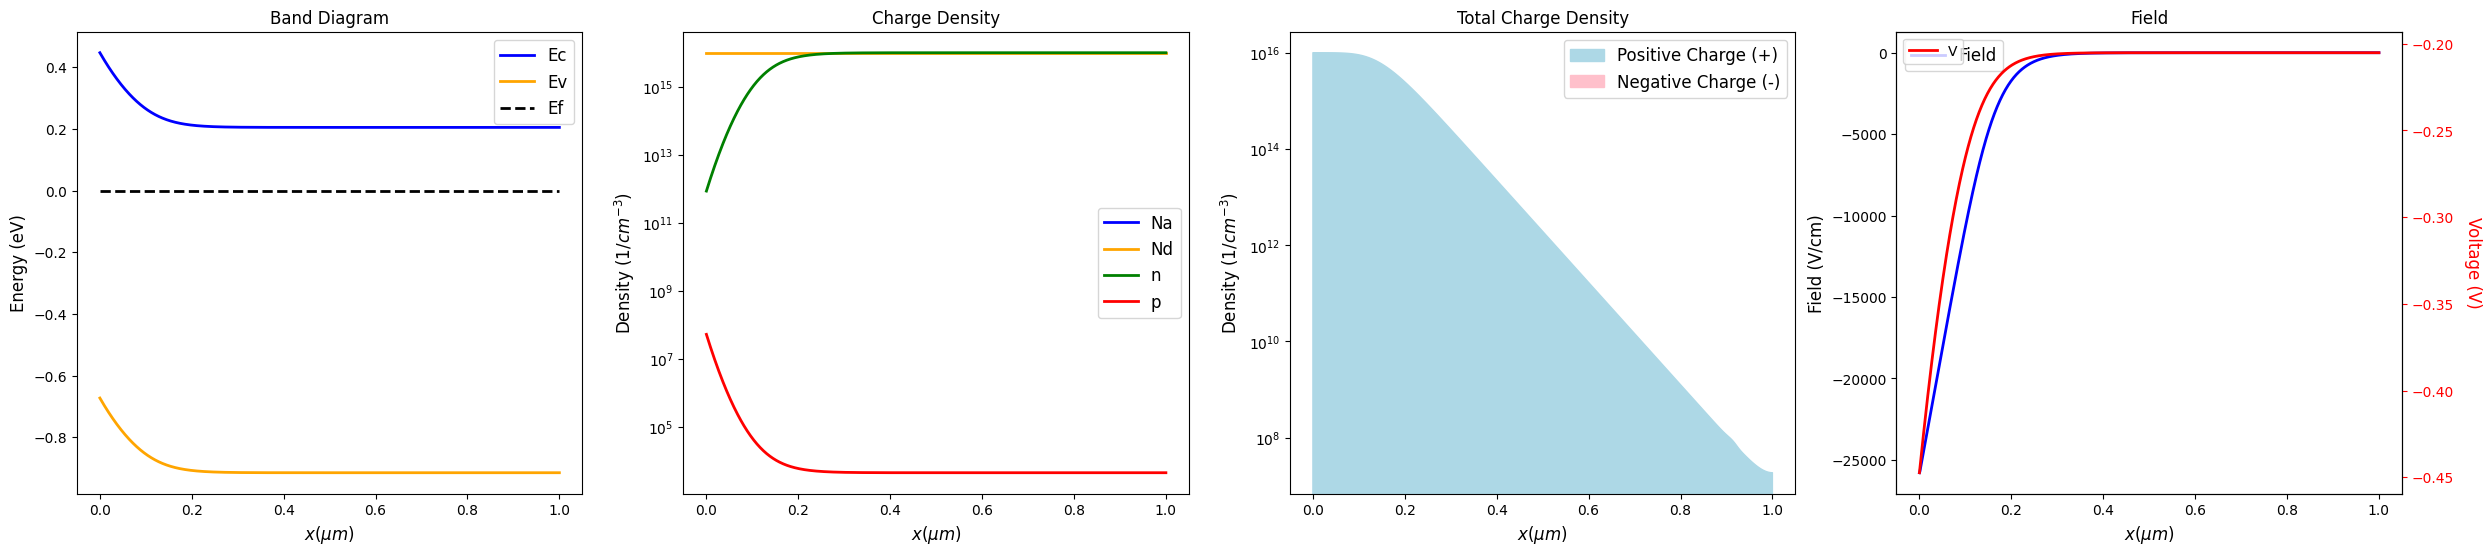

In [11]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N+ N / Heavy Doping+ BC? -> Metal - Semi junction

In [12]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(0, 1e-4, 1000) # cm
Na = np.zeros_like(x)
Nd = dope_constant_donor(x = x, Na = 6e17, x_range=[0,0.02e-4]) + dope_constant_donor(x = x, Na = 1e16, x_range=[0.02e-4,np.inf]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [13]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  


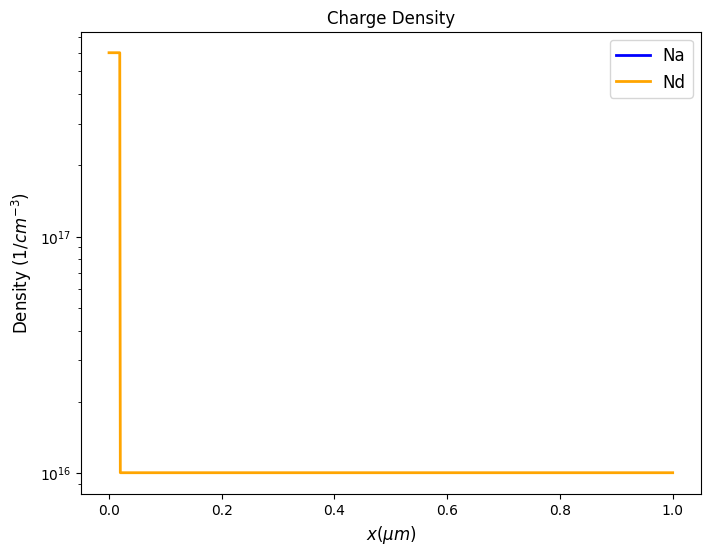

In [14]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [15]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000, tol=1e-11)

 76%|███████▌  | 1522/2000 [00:03<00:01, 396.76it/s]


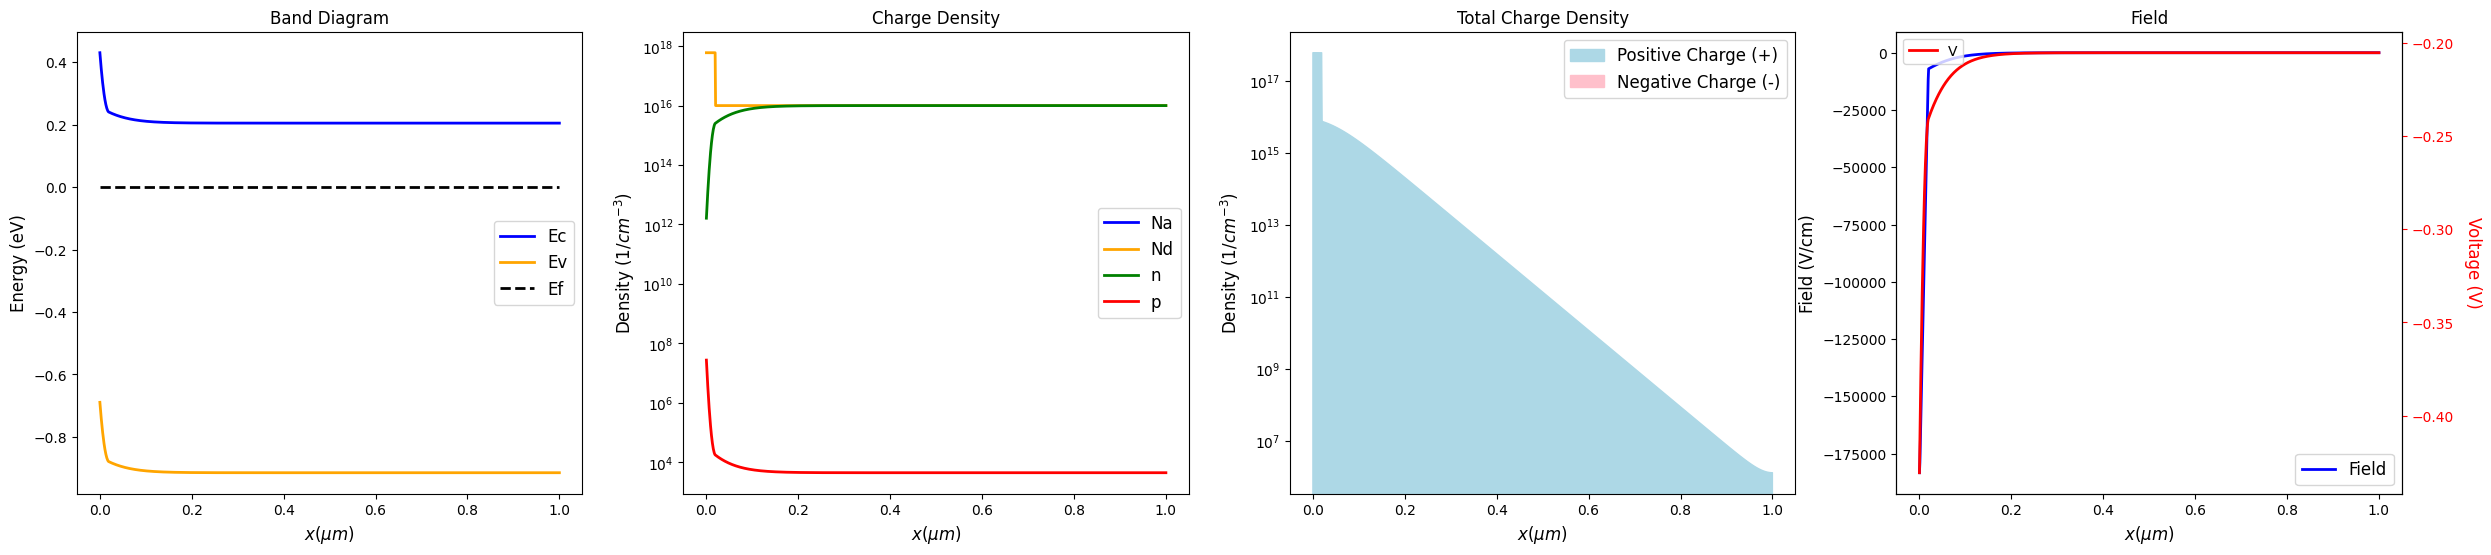

In [16]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N + BC + Dipole? 

In [17]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(0, 1e-4, 1000) # cm
L = 0.05e-4
Na = np.zeros_like(x)
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[L,np.inf]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[0, np.inf],]) / e 

# dipole
mask1 = np.bitwise_and(x>=0, x<L/3)
mask2 = np.bitwise_and(x>=(1-1/3)*L, x<L)

N_dipole = 3e17
Na[mask2] = N_dipole
Nd[mask1] = N_dipole


materials = ['Si',]
x_range = np.array( [ [L, np.inf], ] )

In [18]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    Ec = cal_Ec_from_V(x, V)
    return cal_electron_density_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_p(x, V):
    Ev = cal_Ev_from_V(x, V)
    return cal_hole_density_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dn_dV(x, V):
    Ec = cal_Ec_from_V(x, V)
    return -cal_dn_dEc_at_different_x(x = x, Ec = Ec, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)
def cal_dp_dV(x, V):
    Ev = cal_Ev_from_V(x, V)
    return -cal_dp_dEv_at_different_x(x = x, Ev = Ev, Ef = 0.0, kT = kT_q, materials = materials, x_range = x_range)

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  

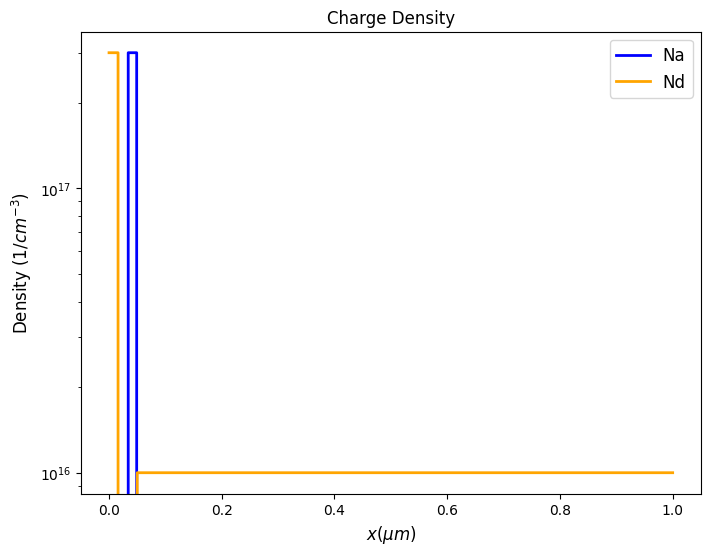

In [19]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [20]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000, tol=1e-10)

 21%|██        | 420/2000 [00:01<00:04, 392.94it/s]


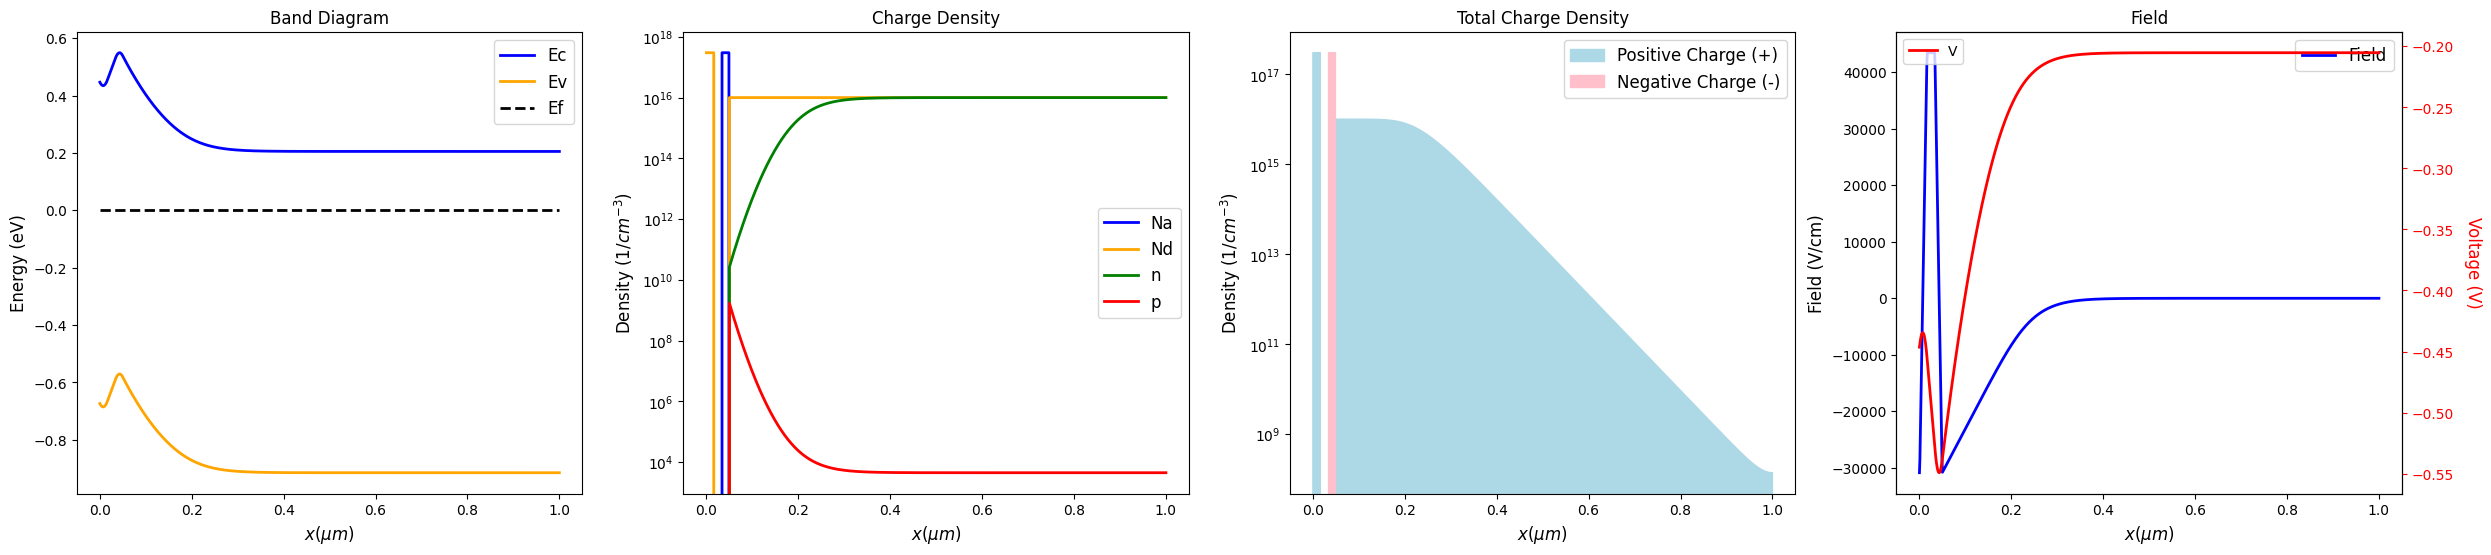

In [21]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);